In [1]:

import matplotlib.pyplot as plt
import numpy as np
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import load_data as ld
import classes as cl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import functions as f

## Logistic Classification code for Wisconsin data

In [2]:
X, y = ld.load_wisconsin_data()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Scale and center the data
X_train, X_test = f.scale_train_test(train = X_train, test = X_test)

# Define learning rates and epochs
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs_list = [900, 925, 950, 975, 1000]
lambda_reg = 0.001  # Single lambda value

# Initialize a 2D array to store accuracy values
accuracy_array = np.zeros((len(learning_rates), len(epochs_list)))

for j, n_iter in enumerate(epochs_list):
    for i, lr in enumerate(learning_rates):
        # Initialize the model with the current parameters
        model = cl.LogisticRegressionSGD(
            learning_rate=lr,
            n_iter=n_iter,
            lambda_reg=lambda_reg,
            batch_size=32,              # Adjust as needed
            optimizer='sgd',           # Use 'sgd', 'adam', etc.
            gradient_method='analytical'
        )
        model.fit(X_train, y_train)
        y_pred_class = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred_class)

        # Store the accuracy in the array
        accuracy_array[i, j] = accuracy

Shape of X_train: (455, 2)
Shape of X_test: (114, 2)
Shape of y_train: (455, 1)
Shape of y_test: (114, 1)


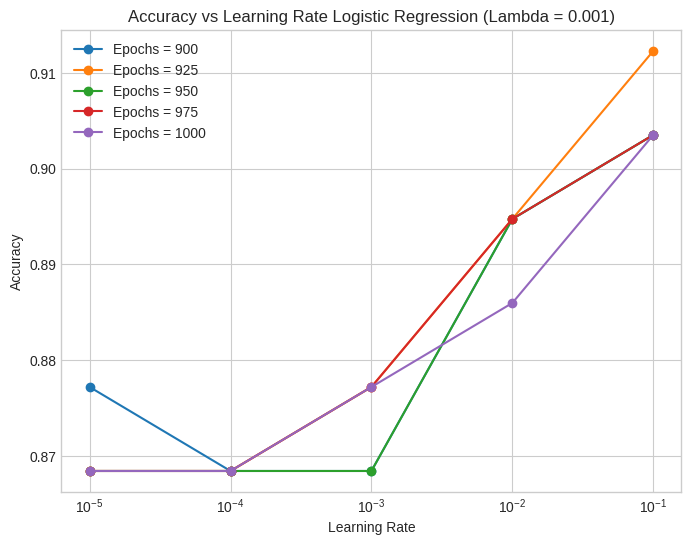

In [3]:
f.plot_accuracy_vs_learning_rates_logisticregression(accuracy_array, learning_rates, epochs_list ,lambda_reg)

## Logistic Classification code for Wisconsin data using Scikit-learn

In [4]:
from sklearn.linear_model import SGDClassifier

# Load the dataset
X, y = ld.load_wisconsin_data()
y = y.ravel()  # Ensure y is a 1D array

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Scale and center the data
X_train, X_test = f.scale_train_test(train = X_train, test = X_test)

# Define learning rates and epochs
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs_list = [900, 925, 950, 975, 1000]
lambda_reg = 0.001  # Single lambda value

# Initialize a 2D array to store accuracy values
accuracy_array = np.zeros((len(learning_rates), len(epochs_list)))

for j, n_iter in enumerate(epochs_list):
    for i, lr in enumerate(learning_rates):
        # Initialize the model with the current parameters
        model = SGDClassifier(
            loss='log_loss',            # Logistic regression
            penalty='l2',          # L2 regularization
            alpha=lambda_reg,      # Regularization strength
            max_iter=n_iter,
            learning_rate='constant',
            eta0=lr,               # Initial learning rate
            random_state=2024,
            tol=None,              # Disable early stopping based on tolerance
            shuffle=True
        )
        model.fit(X_train, y_train)
        y_pred_class = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred_class)

        # Store the accuracy in the array
        accuracy_array[i, j] = accuracy

        # Output results
        print(f"Epochs: {n_iter}, Learning Rate: {lr}, Accuracy: {accuracy:.4f}")


Shape of X_train: (455, 2)
Shape of X_test: (114, 2)
Shape of y_train: (455,)
Shape of y_test: (114,)
Epochs: 900, Learning Rate: 1e-05, Accuracy: 0.8772
Epochs: 900, Learning Rate: 0.0001, Accuracy: 0.8860
Epochs: 900, Learning Rate: 0.001, Accuracy: 0.9123
Epochs: 900, Learning Rate: 0.01, Accuracy: 0.9123
Epochs: 900, Learning Rate: 0.1, Accuracy: 0.8947
Epochs: 925, Learning Rate: 1e-05, Accuracy: 0.8772
Epochs: 925, Learning Rate: 0.0001, Accuracy: 0.8947
Epochs: 925, Learning Rate: 0.001, Accuracy: 0.9123
Epochs: 925, Learning Rate: 0.01, Accuracy: 0.9123
Epochs: 925, Learning Rate: 0.1, Accuracy: 0.9035
Epochs: 950, Learning Rate: 1e-05, Accuracy: 0.8772
Epochs: 950, Learning Rate: 0.0001, Accuracy: 0.8947
Epochs: 950, Learning Rate: 0.001, Accuracy: 0.9123
Epochs: 950, Learning Rate: 0.01, Accuracy: 0.9123
Epochs: 950, Learning Rate: 0.1, Accuracy: 0.8772
Epochs: 975, Learning Rate: 1e-05, Accuracy: 0.8772
Epochs: 975, Learning Rate: 0.0001, Accuracy: 0.8947
Epochs: 975, Learni

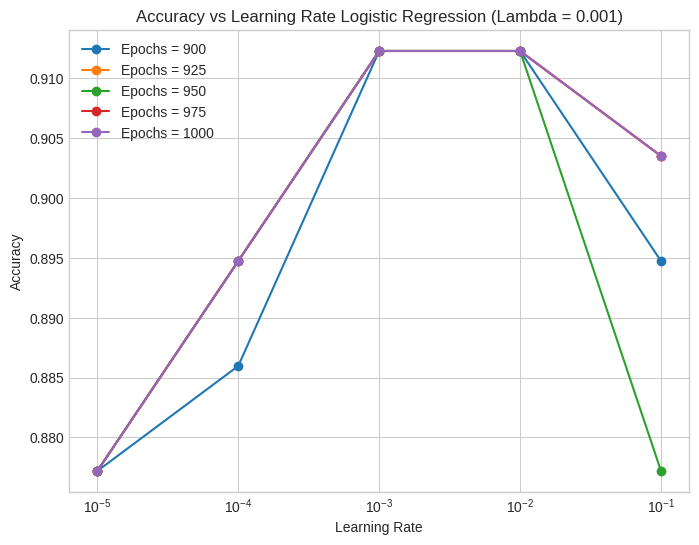

In [5]:
f.plot_accuracy_vs_learning_rates_logisticregression(accuracy_array, learning_rates, epochs_list, lambda_reg)